# Mark Middleton
# 11/24/2023

- Determine lives lost versus those who survived by sex
- Determine lives lost versus those who survived by class
- Calculate the conditional probability that a person survives given their sex and passenger-class

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
# Reads and imports the csv file as data frame, displays and analyzes information

df = pd.read_csv('titanic.csv')

print(df)
df.describe()

     Survived  Pclass                                               Name  \
0           0       3                             Mr. Owen Harris Braund   
1           1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2           1       3                              Miss. Laina Heikkinen   
3           1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4           0       3                            Mr. William Henry Allen   
..        ...     ...                                                ...   
882         0       2                               Rev. Juozas Montvila   
883         1       1                        Miss. Margaret Edith Graham   
884         0       3                     Miss. Catherine Helen Johnston   
885         1       1                               Mr. Karl Howell Behr   
886         0       3                                 Mr. Patrick Dooley   

        Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0      m

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [5]:
# Creates a new data frame organized by sex, then groups them individually

sex = df.groupby("Sex")
male = sex.get_group("male")
female = sex.get_group("female")

array([[<Axes: title={'center': 'Survived'}>]], dtype=object)

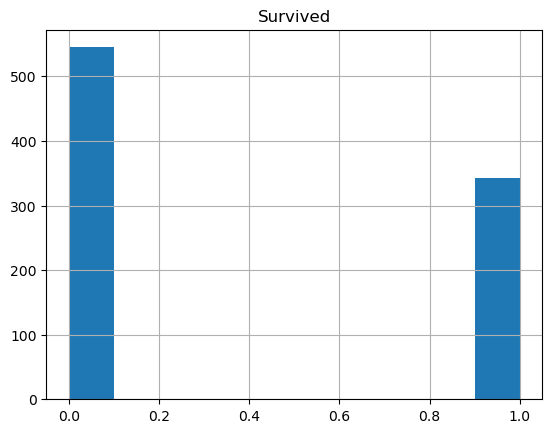

In [23]:
# Displays information from the original dataframe, with sexes and classes together

df.hist('Survived')

Sex
female    [[Axes(0.125,0.11;0.775x0.77)]]
male      [[Axes(0.125,0.11;0.775x0.77)]]
dtype: object

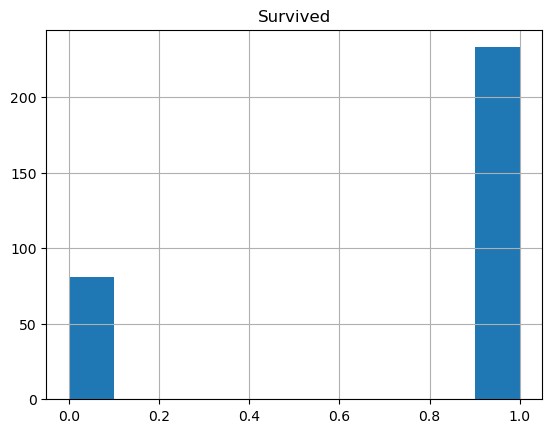

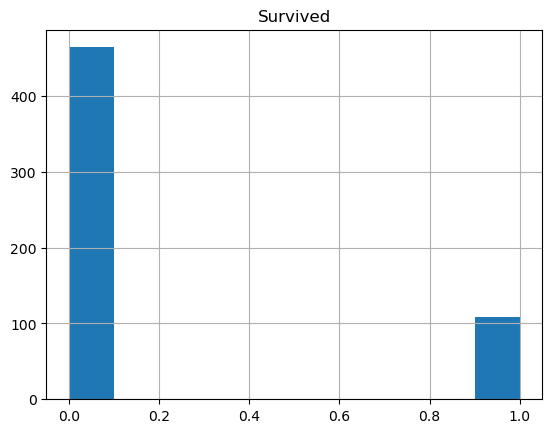

In [22]:
# Displays information from the 'sex' dataframe of survival rates between the two sexes

sex.hist('Survived')

In [16]:
# Analyzes data between sexes

sex.describe()

Survived                                              Pclass            \
          count      mean       std  min  25%  50%  75%  max  count      mean   
Sex                                                                             
female    314.0  0.742038  0.438211  0.0  0.0  1.0  1.0  1.0  314.0  2.159236   
male      573.0  0.190227  0.392823  0.0  0.0  0.0  0.0  1.0  573.0  2.385689   

        ... Parents/Children Aboard        Fare                              \
        ...                     75%  max  count       mean        std   min   
Sex     ...                                                                   
female  ...                     1.0  6.0  314.0  44.479818  57.997698  6.75   
male    ...                     0.0  5.0  573.0  25.633935  43.267730  0.00   

                                            
              25%      50%   75%       max  
Sex                                         
female  12.071875  23.0000  55.0  512.3292  
male     7.895800  11.1333  27.0  512.3292  

[2 rows x 48 columns]

([<matplotlib.axis.XTick at 0x13b923b77d0>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

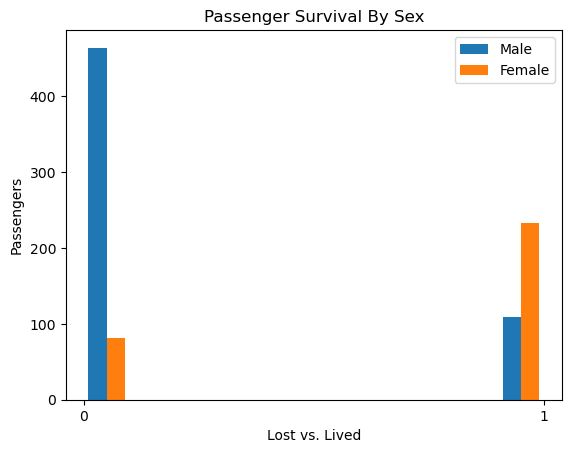

In [46]:
#  Displays histogram showing the divided of passenger survival by sex

plt.hist([male['Survived'], female['Survived']], label= ['Male', 'Female'])
plt.legend()
plt.title('Passenger Survival By Sex')
plt.xlabel('Lost vs. Lived')
plt.ylabel('Passengers')
plt.xticks([0, 1])

In [11]:
# Creates a new data frame organized by class, then groups them individually

pClass = df.groupby("Pclass")
first = pClass.get_group(1)
second = pClass.get_group(2)
third = pClass.get_group(3)

Pclass
1    [[Axes(0.125,0.11;0.775x0.77)]]
2    [[Axes(0.125,0.11;0.775x0.77)]]
3    [[Axes(0.125,0.11;0.775x0.77)]]
dtype: object

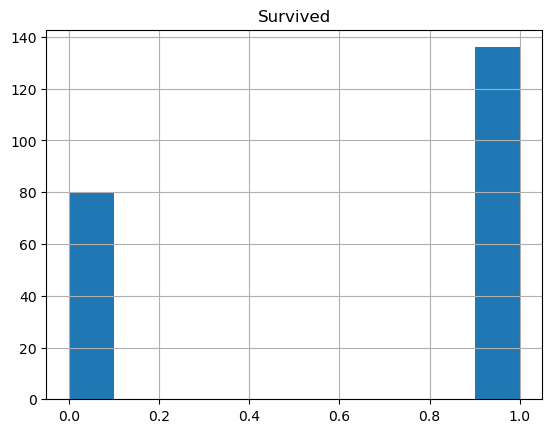

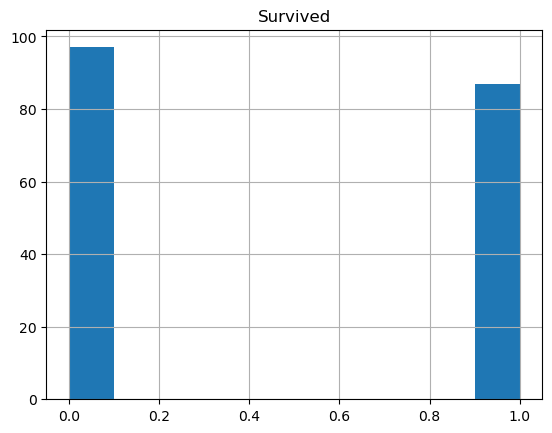

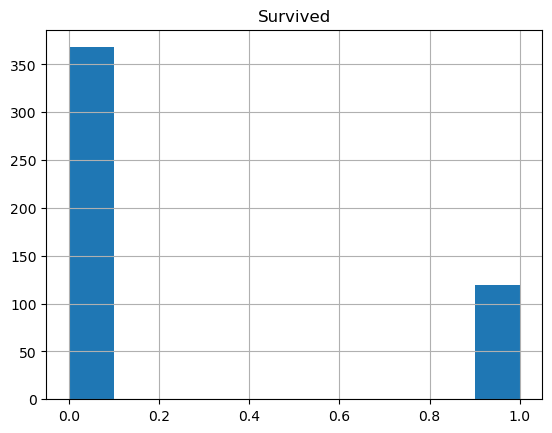

In [19]:
# Shows individual histrograms for suvival in each class

pClass.hist('Survived')

([<matplotlib.axis.XTick at 0x13b911208d0>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

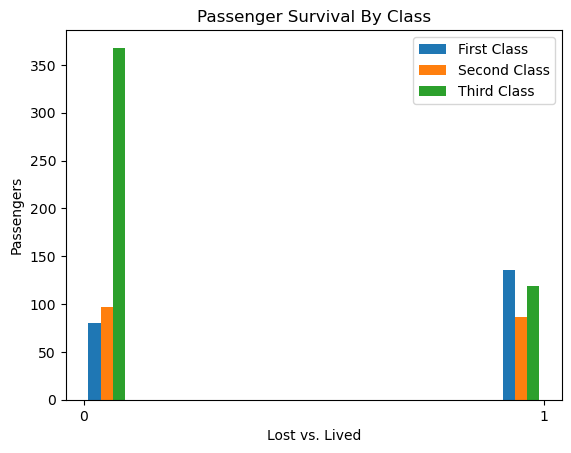

In [47]:
# Displays a histogram showing survival rates between each class

plt.hist([first['Survived'], second['Survived'], third['Survived']], label= ['First Class', 'Second Class', 'Third Class'])
plt.legend()
plt.title('Passenger Survival By Class')
plt.xlabel('Lost vs. Lived')
plt.ylabel('Passengers')
plt.xticks([0, 1])

In [17]:
# Describes survival data between class

pClass.describe()

Survived                                                 Age  \
          count      mean       std  min  25%  50%  75%  max  count   
Pclass                                                                
1         216.0  0.629630  0.484026  0.0  0.0  1.0  1.0  1.0  216.0   
2         184.0  0.472826  0.500623  0.0  0.0  0.0  1.0  1.0  184.0   
3         487.0  0.244353  0.430145  0.0  0.0  0.0  0.0  1.0  487.0   

                   ... Parents/Children Aboard        Fare             \
             mean  ...                     75%  max  count       mean   
Pclass             ...                                                  
1       38.788981  ...                     0.0  4.0  216.0  84.154687   
2       29.868641  ...                     1.0  3.0  184.0  20.662183   
3       25.188747  ...                     0.0  6.0  487.0  13.707707   

                                                           
              std  min       25%      50%   75%       max  
Pclass                                                     
1       78.380373  0.0  30.92395  60.2875  93.5  512.3292  
2       13.417399  0.0  13.00000  14.2500  26.0   73.5000  
3       11.817309  0.0   7.75000   8.0500  15.5   69.5500  

[3 rows x 40 columns]

In [55]:
# Creates a new data frame with both sex and class of the passengers

grouped = df.groupby(['Sex', 'Pclass'])
grouped.describe()

Survived                                                 Age  \
                 count      mean       std  min  25%  50%  75%  max  count   
Sex    Pclass                                                                
female 1          94.0  0.968085  0.176716  0.0  1.0  1.0  1.0  1.0   94.0   
       2          76.0  0.921053  0.271448  0.0  1.0  1.0  1.0  1.0   76.0   
       3         144.0  0.500000  0.501745  0.0  0.0  0.5  1.0  1.0  144.0   
male   1         122.0  0.368852  0.484484  0.0  0.0  0.0  1.0  1.0  122.0   
       2         108.0  0.157407  0.365882  0.0  0.0  0.0  0.0  1.0  108.0   
       3         343.0  0.137026  0.344377  0.0  0.0  0.0  0.0  1.0  343.0   

                          ... Parents/Children Aboard        Fare              \
                    mean  ...                     75%  max  count        mean   
Sex    Pclass             ...                                                   
female 1       35.255319  ...                     1.0  2.0   94.0  106.125798   
       2       28.980263  ...                     1.0  3.0   76.0   21.970121   
       3       22.135417  ...                     1.0  6.0  144.0   16.118810   
male   1       41.511639  ...                     0.0  4.0  122.0   67.226127   
       2       30.493796  ...                     0.0  2.0  108.0   19.741782   
       3       26.470612  ...                     0.0  5.0  343.0   12.695466   

                                                                             
                     std      min       25%       50%         75%       max  
Sex    Pclass                                                                
female 1       74.259988  25.9292  57.24480  82.66455  134.500000  512.3292  
       2       10.891796  10.5000  13.00000  22.00000   26.062500   65.0000  
       3       11.690314   6.7500   7.85420  12.47500   20.221875   69.5500  
male   1       77.548021   0.0000  27.72810  41.26250   78.459375  512.3292  
       2       14.922235   0.0000  12.33125  13.00000   26.000000   73.5000  
       3       11.740102   0.0000   7.75000   7.92500   10.008300   69.5500  

[6 rows x 40 columns]

In [58]:
# Calculating conditional probability between sex and class

conProb = grouped['Survived'].mean().unstack()
print(conProb)

Pclass         1         2         3
Sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.137026


# Lives Lost Versus Those Who Survived By Sex

### The given information within the csv file "Titanic" provides a list of 887 passengers. Of those passengers, 573 were male and 314 were female. Females had a 74% survival rate, compared to male survival rate of roughly 19%. Roughly 233 or 314 women survived, in contrast to around 109 of 573 male survivors. Thus, women were overwelmingly favored, based on sex, to survive over men.

# Lives Lost Versus Those Who Survived By Class

### Also within the data for the csv file "Titanic" was given the class data for the 887 passengers. For first class, there were 216 passengers. Second class held 184 passengers. Finally, the majority of passengers onboard were third class with 487 passengers. First class passengers had an average survival rate of 63%. Second class was less at 47% and third class held the lowest survival rate at only 24%. Of the 216 first class 137 survived, 87 of  the 184 second class passengers survived, and only 117 of third class passengers survived. Based on this information, survival rates were overwelmingly higher in first class and lowest in third class.

# Calculate The Conditional Probability That A Person Survives Given Their Sex And Passenger-Class

### For the 887 passengers in the data that we are given, the distinct between class and sex can be made to discover the probabiliity of survival for each sex, within each passenger class. Of first class women, 96.8% survived, followed by 92% of second class women, and 50% of third class. Men faired for worse, with first class men having the highest survival rate of their sex at only 36.9%, followed by 15.7% of second class men, and 13.7% thrid class men. Based on this data, those with the highest probability of survival, based on sex and class, were first class women.